<a href="https://colab.research.google.com/github/bhargavi2208/Bhargavi-Patil/blob/main/Gold_Price_Prediction_Using_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install pycaret-ts-alpha

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('/content/Pycaret.csv')
print(df)

        Date  Price   Open   High    Low  Volume Change %
0    2011-01  19931  20559  20687  19486  755810   -3.04%
1    2011-02  20682  19980  20948  19676  404790    3.77%
2    2011-03  20697  20727  21273  20457  750060    0.07%
3    2011-04  22703  20730  22734  20511  426010    9.69%
4    2011-05  22454  22530  22698  21521  925560   -1.10%
..       ...    ...    ...    ...    ...     ...      ...
127  2021-08  47060  48094  48300  45708  216820   -1.76%
128  2021-09  46221  47060  47599  45488  255700   -1.78%
129  2021-10  47502  46303  48140  46125  235430    2.77%
130  2021-11  47439  47649  49579  46839  263410   -0.13%
131  2021-12  47994  47488  48638  47150  182850    1.17%

[132 rows x 7 columns]


In [15]:
df['Date']=pd.to_datetime(df['Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      132 non-null    datetime64[ns]
 1   Price     132 non-null    int64         
 2   Open      132 non-null    int64         
 3   High      132 non-null    int64         
 4   Low       132 non-null    int64         
 5   Volume    132 non-null    int64         
 6   Change %  132 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 7.3+ KB


In [17]:
df = df[["Date","Price"]]
df

,Date,Price
0,2011-01-01,19931
1,2011-02-01,20682
2,2011-03-01,20697
3,2011-04-01,22703
4,2011-05-01,22454
...,...,...
127,2021-08-01,47060
128,2021-09-01,46221
129,2021-10-01,47502
130,2021-11-01,47439


In [18]:
df.head()

,Date,Price
0,2011-01-01,19931
1,2011-02-01,20682
2,2011-03-01,20697
3,2011-04-01,22703
4,2011-05-01,22454


In [19]:
gp_df=df.set_index('Date')

In [20]:
gp_df_monthly=gp_df.resample('M').mean()

In [21]:
gp_df_monthly.head()

,Price
Date,
2011-01-31,19931.0
2011-02-28,20682.0
2011-03-31,20697.0
2011-04-30,22703.0
2011-05-31,22454.0


In [47]:
gp_df_monthly.shape

(132, 1)

In [23]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 5.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret-ts-alpha 3.0.0.dev1649017462 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

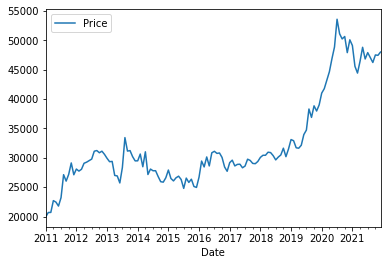

In [25]:

gp_df_monthly.plot();

In [26]:
!pip install pycaret-ts-alpha

  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [27]:
from pycaret.time_series import *
setup(gp_df_monthly, fh = 12, fold = 4, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(132, 1)"
5,Train data shape,"(120, 1)"
6,Test data shape,"(12, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,4
9,Enforce Prediction Interval,False


In [28]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,132.0
1,Summary,Statistics,Actual,Mean,,32351.704545
2,Summary,Statistics,Actual,Median,,29766.5
3,Summary,Statistics,Actual,Standard Deviation,,7806.86463
4,Summary,Statistics,Actual,Variance,,60947135.354788
5,Summary,Statistics,Actual,Kurtosis,,0.386549
6,Summary,Statistics,Actual,Skewness,,1.200839
7,Summary,Statistics,Actual,# Distinct Values,,132.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",1194.325062
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",1204.313216


In [29]:
plot_model(plot = 'ts')

In [30]:
plot_model(plot = 'cv')

In [31]:
plot_model(plot = 'train_test_split')

In [32]:
plot_model(plot = 'diagnostics')

In [33]:
plot_model(plot = 'decomp_stl')

In [34]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
ets,ETS,2449.4943,2889.983,0.0585,0.062,0.8862,0.8312,-1.3819,0.2050
theta,Theta Forecaster,3035.7055,3573.3542,0.0715,0.0771,1.0952,1.0253,-2.4567,0.0950
exp_smooth,Exponential Smoothing,3021.3424,3424.896,0.0739,0.0788,1.0905,0.9829,-3.3079,0.2025
naive,Naive Forecaster,3659.6875,4154.2861,0.0888,0.0962,1.3169,1.191,-5.2842,1.3900
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,3866.4631,4410.5065,0.0894,0.0991,1.3968,1.265,-3.1538,0.0775
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,3866.4631,4410.5065,0.0894,0.0991,1.3968,1.265,-3.1538,0.0425
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,3866.4635,4410.5068,0.0894,0.0991,1.3968,1.265,-3.1538,0.0850
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,3866.4637,4410.507,0.0894,0.0991,1.3968,1.265,-3.1538,0.0425
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,3866.4631,4410.5065,0.0894,0.0991,1.3968,1.265,-3.1538,0.1175
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,3878.0961,4420.0413,0.0896,0.0994,1.4011,1.2678,-3.1519,0.0400


In [42]:
plot_model(best, plot = 'forecast')

In [43]:
plot_model(finalize_model(best),plot = 'forecast',data_kwargs={'fh':12})

In [44]:
plot_model(best, plot = 'residuals')

In [45]:
plot_model(best, plot = 'diagnostics')

In [46]:
predict_model(finalize_model((best),{'fh':[12]}))

,y_pred
2022-01,49033.4506
2022-02,48705.9169
2022-03,48020.0617
2022-04,49342.9779
2022-05,49591.2023
2022-06,49815.1791
2022-07,51308.2617
2022-08,52526.3709
2022-09,51389.3427
2022-10,52010.8640


In [ ]:
#Conclusion : Difference between Predicted Price & Actual Gold Price FOr 1st month is 1093 Rs.